In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
import xgboost as xgb
from scipy import stats

In [27]:
campus = pd.read_csv('/content/Placement_Data_Full_Class (1).csv', index_col='sl_no')
campus.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [28]:
campus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [29]:
campus.shape

(215, 14)

In [30]:
campus.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

EDA to find out Which factor influenced a candidate in getting placed?

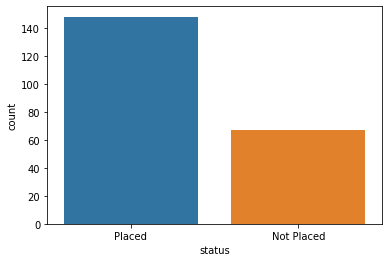

In [31]:
sns.countplot(campus['status'])

In [32]:
campus.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [33]:
catcols = ['gender', 'ssc_b', 'hsc_s','hsc_b', 'degree_t', 'workex', 'specialisation']
numcols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

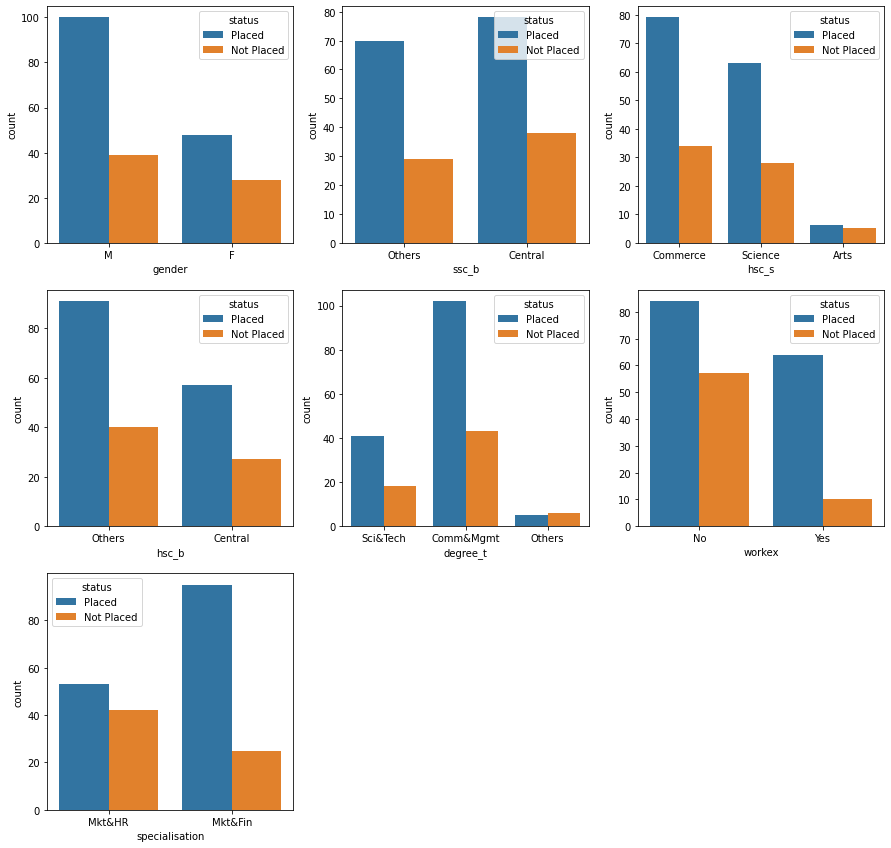

In [34]:
plt.figure(figsize=(15,20))
for i in range(0,7):
  plt.subplot(4,3,i+1)
  sns.countplot(x = catcols[i], hue = 'status', data = campus)
plt.show()

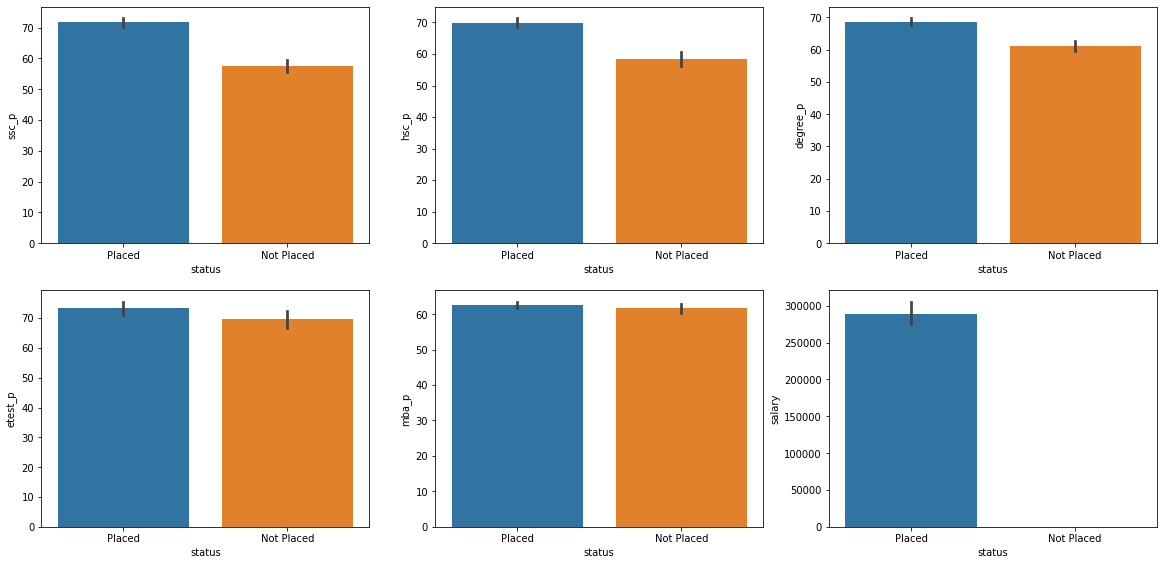

In [35]:
plt.figure(figsize=(20,20))
for i in range(0,6):
  plt.subplot(4,3,i+1)
  sns.barplot(y = numcols[i], x = 'status', data = campus)
plt.show()

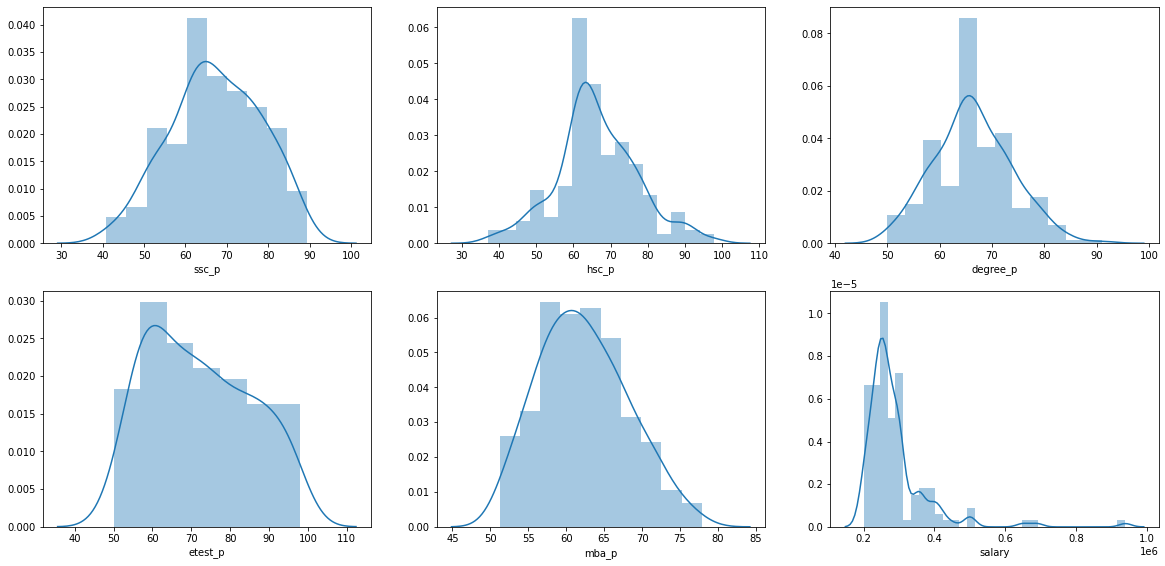

In [36]:
plt.figure(figsize=(20,20))
for i in range(0,6):
  plt.subplot(4,3,i+1)
  sns.distplot(campus[numcols[i]])
plt.show()

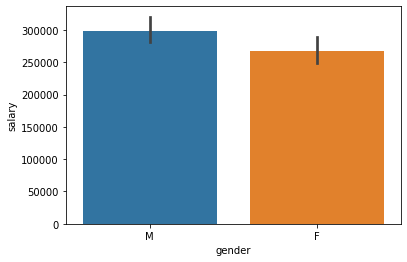

In [37]:
sns.barplot(campus['gender'], campus['salary'])

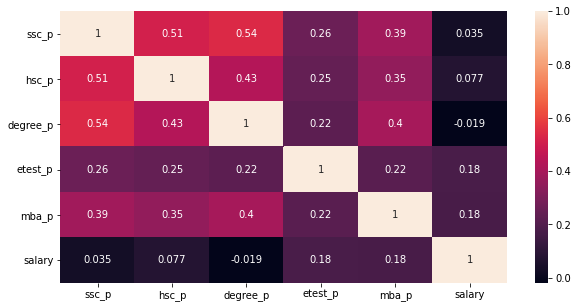

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(campus.corr(), annot=True)

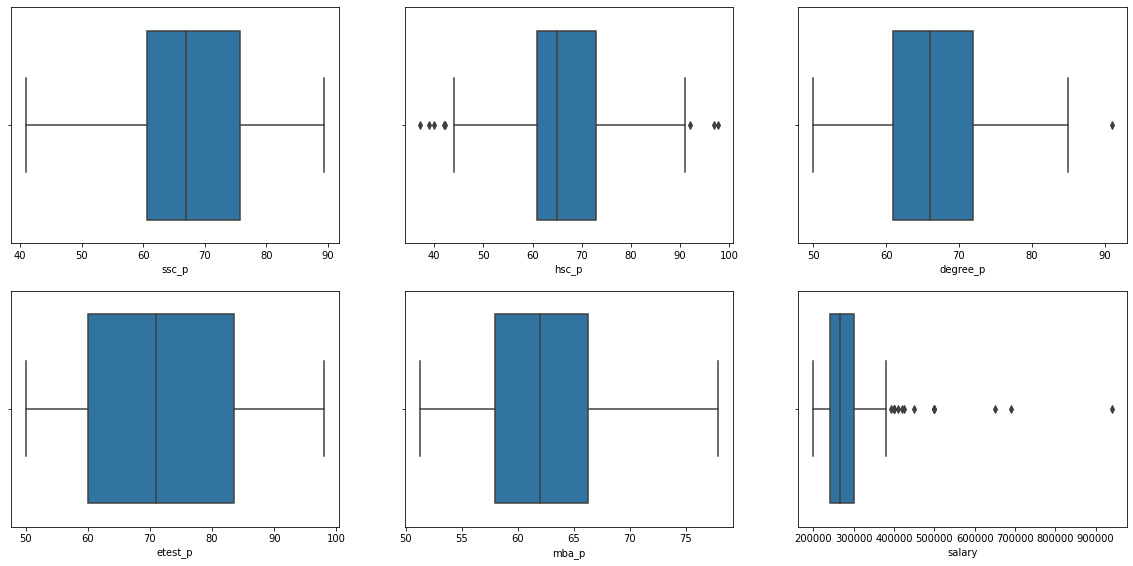

In [39]:
plt.figure(figsize=(20,20))
for i in range(0,6):
  plt.subplot(4,3,i+1)
  sns.boxplot(campus[numcols[i]])
plt.show()

Does percentage matters for one to get placed?

for this, we can take the average percentage of all the percentage combined together and then check the dependency on target variabke

---



In [40]:
avg_pct = []
for i in range(1, 216):
  a = round((campus['ssc_p'][i]+campus['hsc_p'][i]+campus['degree_p'][i]+campus['etest_p'][i]+campus['mba_p'][i])/5, 2)
  avg_pct.append(a)
campus['total_p'] = avg_pct


In [41]:
campus.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,total_p
sl_no,,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,65.96
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,77.58
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,65.96
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,57.09
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,77.00


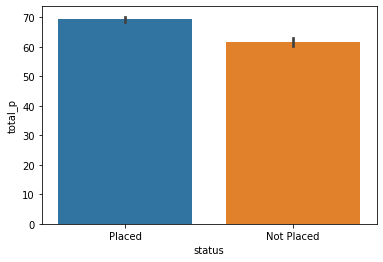

In [42]:
sns.barplot(x = campus['status'], y= campus['total_p']) # those who are having higher total average percentage are likely to placed more 

Which degree specialization is much demanded by corporate?

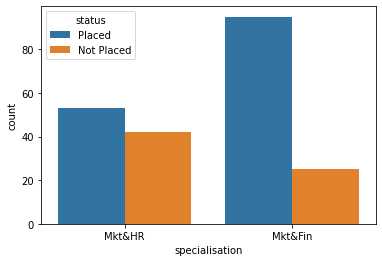

In [43]:
sns.countplot(x = 'specialisation', hue = 'status', data = campus) #Specialization in marketing and finance are much demanded by corporate

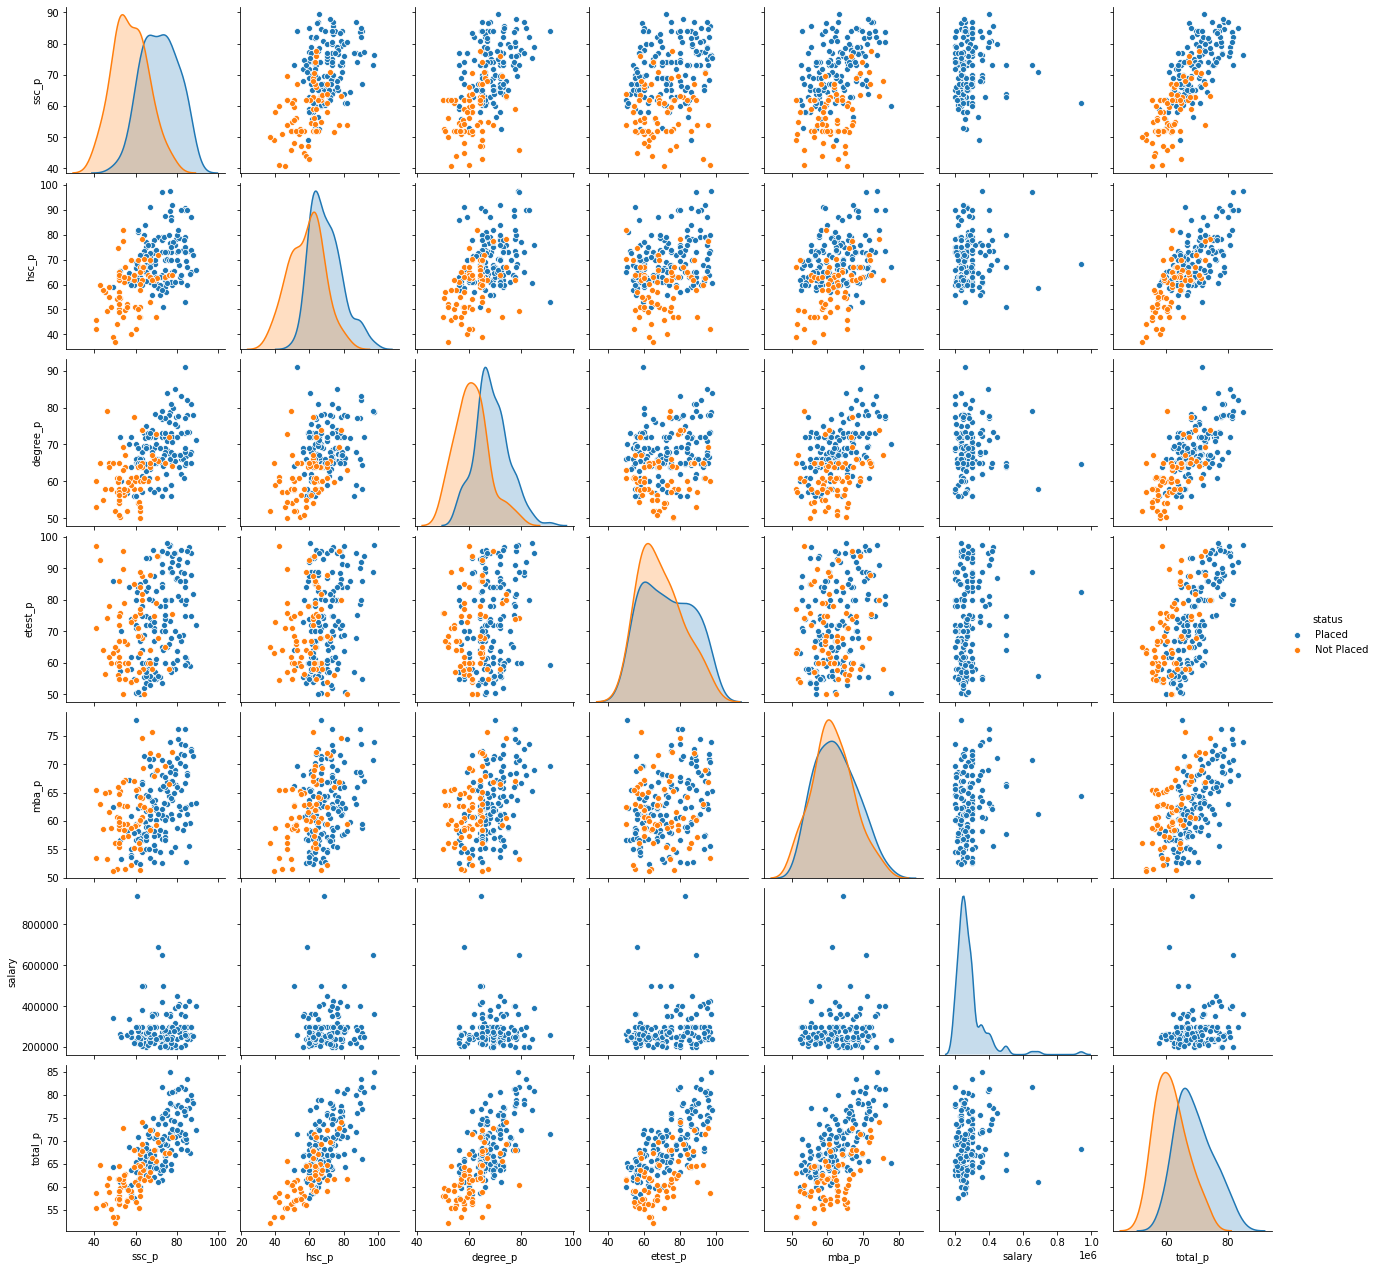

In [44]:
sns.pairplot(campus, hue = 'status')

In [45]:
campus['salary'].fillna(0, inplace = True)

In [46]:
campus.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,total_p
sl_no,,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,65.96
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,77.58
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,65.96
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,57.09
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,77.00


Play with the data conducting all statistical tests.

Statistical tests are used in hypothesis testing. They can be used to:

determine whether a predictor variable has a statistically significant relationship with an outcome variable.
estimate the difference between two or more groups.

Statistical tests make some common assumptions about the data they are testing:

Independence of observations (a.k.a. no autocorrelation): The observations/variables you include in your test are not related (for example, multiple measurements of a single test subject are not independent, while measurements of multiple different test subjects are independent).
Homogeneity of variance: the variance within each group being compared is similar among all groups. If one group has much more variation than others, it will limit the test’s effectiveness.